In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, factorial, cos, sin

In [17]:
# Divided Difference method
x = symbols('x')


def div_diff(x_in, y_out):
    n = len(y_out)
    dd = np.zeros((n, n)) # 2D array
    dd[:, 0] = y_out

    for i in range(1, n):
        for j in range(n - i):
            dy = dd[j+1][i-1] - dd[j][i-1]
            dx = x_in[j+i] - x_in[j]
            dd[j][i] = dy/dx
    return dd[0,:] # coefficients

print(div_diff([0, 2/3, 1, 2], [1, 0.5, 0, 1]))

[ 1.     -0.75   -0.75    1.3125]


In [18]:
def dd_poly(coeff, x_vals):
    n = len(coeff)
    poly = 0
    for i in range(n):
        term = coeff[i]
        for j in range(i):
            term *= x - x_vals[j]
        poly += term
    
    return poly

x_vals = [0, 2/3, 1, 2]
y_vals = [1, 0.5, 0, 1]

approx_poly = dd_poly(div_diff(x_vals, y_vals), x_vals)
approx_poly

1.3125*x*(x - 1)*(x - 0.666666666666667) - 0.75*x*(x - 0.666666666666667) - 0.75*x + 1.0

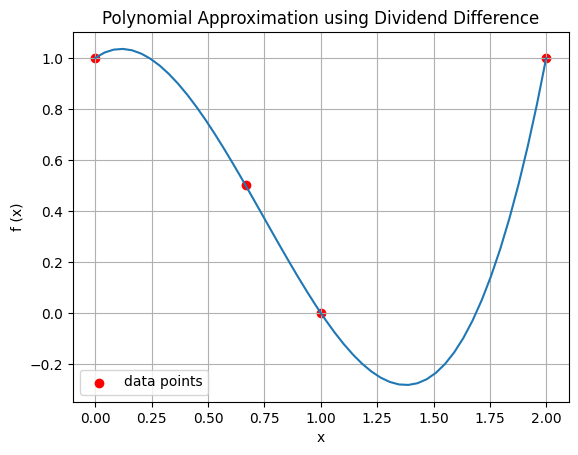

In [19]:
x_in = np.linspace(0, 2, 50)
y = [lambdify(x, approx_poly, 'numpy')(xi) for xi in x_in]

plt.scatter(x_vals, y_vals, color='red', label='data points')
plt.plot(x_in, y)
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title('Polynomial Approximation using Dividend Difference')
plt.grid()
plt.legend()